In [1]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

import tensorflow as tf
import keras
from keras import ops
from keras import layers

In [2]:
%pwd

'e:\\GCET\\Machine Learning\\Deep Learning Projects\\text_recognition\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'e:\\GCET\\Machine Learning\\Deep Learning Projects\\text_recognition'

In [5]:
from pathlib import Path
dataset_dir='D:/mnt/ramdisk/max/90kDICT32px'   #annotation.txt
#dataset_dir='artifacts/Dataset/Word_Level_Training_Set/'

In [6]:
initial_img_path=[]
initial_text_label=[]

with open(os.path.join(dataset_dir,'annotation.txt'), "r", encoding="utf-8") as file:
    lines = file.readlines()
    for i,line in enumerate(lines):
        try:
            path=line.split(" ")[0]
            dir_name, file_name = os.path.split(path)
            label=file_name.split("_")[1]
        except Exception as e:
            print(e," ",i," ",line)

        initial_img_path.append(os.path.join(dataset_dir,path))
        initial_text_label.append(label)

""" initial_img_path=[]
initial_text_label=[]

with open(os.path.join(dataset_dir,'train_filtered.txt'), "r", encoding="utf-8") as file:
    lines = file.readlines()
    for i,line in enumerate(lines):
        try:
            path=line.split("\t")[0]
            label=line.split("\t")[1][:-1]
        except Exception as e:
            print(e," ",i," ",line)

        initial_img_path.append(os.path.join(dataset_dir,path))
        initial_text_label.append(label) """

' initial_img_path=[]\ninitial_text_label=[]\n\nwith open(os.path.join(dataset_dir,\'train_filtered.txt\'), "r", encoding="utf-8") as file:\n    lines = file.readlines()\n    for i,line in enumerate(lines):\n        try:\n            path=line.split("\t")[0]\n            label=line.split("\t")[1][:-1]\n        except Exception as e:\n            print(e," ",i," ",line)\n\n        initial_img_path.append(os.path.join(dataset_dir,path))\n        initial_text_label.append(label) '

In [7]:
print(len(initial_img_path), len(initial_text_label))

8919273 8919273


In [8]:
vocab=set("".join(map(str,initial_text_label)))
#vocab.add('X')  #because X is not there in filtered images(removed cropped and bad images from the directory)

vocab=[char for char in vocab if char.isalnum()]
char_list=sorted(vocab)
print(len(char_list))
print(char_list)

62
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [9]:
#Removing labels and images with non-alphanumeric characters
img_path=[]
text_labels=[]

for i,(path,label) in enumerate(zip(initial_img_path,initial_text_label)):
    if all(char in char_list for char in label):
        img_path.append(path)
        text_labels.append(label)

In [10]:
print(len(img_path), len(text_labels))

8919273 8919273


In [11]:
mask = np.vectorize(len)(text_labels) <= 11  #<=11
#mask = (np.vectorize(len)(text_labels) >= 8) & (np.vectorize(len)(text_labels) <= 10)

img_path=np.array(img_path)
text_labels=np.array(text_labels)

filtered_img_paths = img_path[mask]
filtered_text_labels = text_labels[mask]

In [12]:
print(len(filtered_img_paths), len(filtered_text_labels))

8082518 8082518


In [13]:
# Filter out numeric images and labels
numeric_mask = np.vectorize(lambda label: label.isnumeric())(filtered_text_labels)

numeric_img_path = filtered_img_paths[numeric_mask]
numeric_text_labels = filtered_text_labels[numeric_mask]

In [14]:
len(numeric_img_path), len(numeric_text_labels)

(12470, 12470)

In [15]:
# Randomly select 45000 images

import numpy as np

#size=len(img_path)
size=len(filtered_img_paths)
random_indices = np.random.choice(size, 45000, replace=False)

In [16]:
""" img_path=np.array(img_path)
text_labels=np.array(text_labels)

img_path=img_path[random_indices]
text_labels=text_labels[random_indices] """

#img_path=np.array(img_path)
#text_labels=np.array(text_labels)

filtered_img_paths=filtered_img_paths[random_indices]
filtered_text_labels=filtered_text_labels[random_indices]

In [17]:
print(len(filtered_img_paths), len(filtered_text_labels))

45000 45000


In [18]:
merged_img_paths = np.concatenate((filtered_img_paths, numeric_img_path))
merged_text_labels = np.concatenate((filtered_text_labels, numeric_text_labels))

print(len(merged_img_paths), len(merged_text_labels))

57470 57470


In [19]:
""" import cv2

for idx,path in enumerate(img_path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        img_path = np.delete(img_path, idx)
        text_labels = np.delete(text_labels, idx)
    elif len(img.shape) != 2:
        img_path = np.delete(img_path, idx)
        text_labels = np.delete(text_labels, idx) """

import cv2

for idx,path in enumerate(merged_img_paths):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        merged_img_paths = np.delete(merged_img_paths, idx)
        merged_text_labels = np.delete(merged_text_labels, idx)
    elif len(img.shape) != 2:
        merged_img_paths = np.delete(merged_img_paths, idx)
        merged_text_labels = np.delete(merged_text_labels, idx)

In [20]:
#print(len(img_path), len(text_labels))
print(len(merged_img_paths), len(merged_text_labels))

57470 57470


In [21]:
max_label_len = max([len(str(text)) for text in initial_text_label])
max_label_len

23

In [22]:
len_text_labels = np.vectorize(len)(text_labels)

np.quantile(len_text_labels, 0.1)

np.float64(5.0)

In [ ]:
""" mask = np.vectorize(len)(text_labels) <= 11  #<=11
#mask = (np.vectorize(len)(text_labels) >= 8) & (np.vectorize(len)(text_labels) <= 10)
filtered_img_paths = img_path[mask]
filtered_text_labels = text_labels[mask] """

In [ ]:
""" print(len(filtered_img_paths), len(filtered_text_labels)) """

27244 27244


In [23]:
max_label_len = max([len(str(text)) for text in merged_text_labels])
max_label_len

11

In [24]:
char_to_num = layers.StringLookup(
    vocabulary=list(char_list),
    mask_token=None,
    oov_token=None  # disables [UNK]
)

In [25]:
num_to_char = layers.StringLookup(
    vocabulary=list(char_list),
    mask_token=None,
    oov_token="*" ,   # Dummy string just to keep Keras happy
    invert=True
)

In [26]:
def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = ops.arange(size)
    if shuffle:
        indices = keras.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid

In [27]:
x_train, x_valid, y_train, y_valid = split_data(merged_img_paths, merged_text_labels)

In [28]:
img_height=56
img_width=224

In [29]:
""" def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = ops.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = ops.transpose(img, axes=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))

    #pad_value = tf.cast(len(char_list), tf.int64)
    #label = tf.pad(label, paddings=[[0, max_label_len - tf.shape(label)[0]]], constant_values=pad_value)
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label} """

""" def encode_single_sample(img_path, label):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # 3. Otsu threshold to detect background vs text
    _, thresh = cv2.threshold(img.squeeze(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 4. Count white vs black pixels
    white = np.sum(thresh == 255)
    black = np.sum(thresh == 0)
    
    # 5. If background is dark (more black than white), invert
    if black > white:
        img = cv2.bitwise_not(img)

    # 6. Resize and normalize
    img = cv2.resize(img, (112, 28), interpolation=cv2.INTER_LINEAR)
    img = img.astype(np.float32) / 255.0
    
    # 7. Add channel dimension and apply Gaussian blur
    img = np.expand_dims(img, axis=-1)
    blur = cv2.GaussianBlur(img, (1,1), 0)
    _, binary_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 8. Final normalization and shape adjustment
    img = binary_img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = ops.transpose(img, axes=[1, 0, 2])

    # 9. Convert label
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))

    return {"image": img, "label": label} """

' def encode_single_sample(img_path, label):\n    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)\n\n    # 3. Otsu threshold to detect background vs text\n    _, thresh = cv2.threshold(img.squeeze(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n    # 4. Count white vs black pixels\n    white = np.sum(thresh == 255)\n    black = np.sum(thresh == 0)\n\n    # 5. If background is dark (more black than white), invert\n    if black > white:\n        img = cv2.bitwise_not(img)\n\n    # 6. Resize and normalize\n    img = cv2.resize(img, (112, 28), interpolation=cv2.INTER_LINEAR)\n    img = img.astype(np.float32) / 255.0\n\n    # 7. Add channel dimension and apply Gaussian blur\n    img = np.expand_dims(img, axis=-1)\n    blur = cv2.GaussianBlur(img, (1,1), 0)\n    _, binary_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)\n\n    # 8. Final normalization and shape adjustment\n    img = binary_img.astype(np.float32) / 255.0\n    img = np.expand_dims(img, axis=-1)\n    i

In [30]:
def encode_single_sample(img_path, label):
    img_path = img_path.numpy().decode('utf-8')
    label = label.numpy().decode('utf-8')

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # IMPORTANT: img must be uint8 for threshold
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    white = np.sum(thresh == 255)
    black = np.sum(thresh == 0)

    if black > white:
        img = cv2.bitwise_not(img)

    img = cv2.resize(img, (224, 56), interpolation=cv2.INTER_LINEAR)
    
    # Only now normalize after thresholding!
    img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    # # Apply Gaussian Blur
    # blur = cv2.GaussianBlur(img, (1,1), 0)

    # # Convert blur back to uint8 before thresholding again
    # blur_uint8 = np.clip(blur * 255.0, 0, 255).astype(np.uint8)

    # _, binary_img = cv2.threshold(blur_uint8, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # # Normalize final binary image
    # img = binary_img.astype(np.float32) / 255.0
    
    img = tf.convert_to_tensor(img, dtype=tf.float32)
    img = tf.transpose(img, perm=[1, 0, 2])

    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))

    return img, label



def encode_single_sample_wrapper(img_path, label):
    img, label = tf.py_function(
        func=encode_single_sample,
        inp=[img_path, label],
        Tout=[tf.float32, tf.int64]   # <-- list, not dict
    )
    
    # You must set shapes manually because tf.py_function loses shape information
    img.set_shape([28, 112, 1])
    label.set_shape([None])  # variable length label

    return {"image": img, "label": label}



In [31]:
""" batch_size = 100

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)
 """
batch_size = 100

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset
    .map(encode_single_sample_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size, 
        padded_shapes={"image": [None, None, 1], "label": [None]},
        padding_values={"image": 0.0, "label": tf.cast(len(char_to_num.get_vocabulary()), tf.int64)})
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset
    .map(encode_single_sample_wrapper, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size, 
        padded_shapes={"image": [None, None, 1], "label": [None]},
        padding_values={"image": 0.0, "label": tf.cast(len(char_to_num.get_vocabulary()), tf.int64)})
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


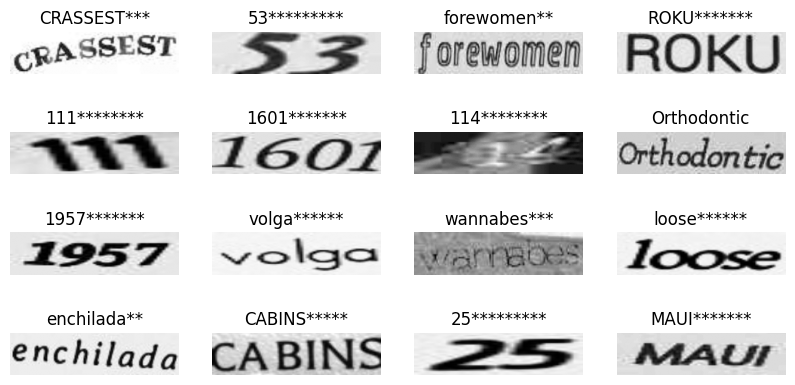

In [32]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in validation_dataset.take(2):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        #label = labels[i]
        #print(len(label), label)
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

# **Model**

In [33]:
def ctc_label_dense_to_sparse(labels, label_lengths):
    label_shape = ops.shape(labels)
    num_batches_tns = ops.stack([label_shape[0]])
    max_num_labels_tns = ops.stack([label_shape[1]])

    def range_less_than(old_input, current_input):
        return ops.expand_dims(ops.arange(ops.shape(old_input)[1]), 0) < tf.fill(
            max_num_labels_tns, current_input
        )

    init = ops.cast(tf.fill([1, label_shape[1]], 0), dtype="bool")
    dense_mask = tf.compat.v1.scan(
        range_less_than, label_lengths, initializer=init, parallel_iterations=1
    )
    dense_mask = dense_mask[:, 0, :]

    label_array = ops.reshape(
        ops.tile(ops.arange(0, label_shape[1]), num_batches_tns), label_shape
    )
    label_ind = tf.compat.v1.boolean_mask(label_array, dense_mask)

    batch_array = ops.transpose(
        ops.reshape(
            ops.tile(ops.arange(0, label_shape[0]), max_num_labels_tns),
            tf.reverse(label_shape, [0]),
        )
    )
    batch_ind = tf.compat.v1.boolean_mask(batch_array, dense_mask)
    indices = ops.transpose(
        ops.reshape(ops.concatenate([batch_ind, label_ind], axis=0), [2, -1])
    )

    vals_sparse = tf.compat.v1.gather_nd(labels, indices)

    return tf.SparseTensor(
        ops.cast(indices, dtype="int64"), 
        vals_sparse, 
        ops.cast(label_shape, dtype="int64")
    )


In [34]:
""" def ctc_batch_cost(y_true, y_pred, input_length, label_length):
    label_length = ops.cast(ops.squeeze(label_length, axis=-1), dtype="int32")
    input_length = ops.cast(ops.squeeze(input_length, axis=-1), dtype="int32")
    sparse_labels = ops.cast(
        ctc_label_dense_to_sparse(y_true, label_length), dtype="int32"
    )

    y_pred = ops.log(ops.transpose(y_pred, axes=[1, 0, 2]) + keras.backend.epsilon())

    return ops.expand_dims(
        tf.compat.v1.nn.ctc_loss(
            inputs=y_pred, labels=sparse_labels, sequence_length=input_length
        ),
        1,
    ) """

def ctc_batch_cost(y_true, y_pred, input_length, label_length, blank_index=63, blank_penalty_weight=0.4):
    """
    Compute CTC loss with an additional penalty for blank index probability.
    
    Args:
        y_true: Ground truth labels, shape [batch, max_label_len].
        y_pred: Predicted logits, shape [batch, max_timesteps, num_classes].
        input_length: Length of input sequences, shape [batch].
        label_length: Length of label sequences, shape [batch].
        blank_index: Index of the blank label (default: 63).
        blank_penalty_weight: Weight for the blank probability penalty (default: 0.1).
    
    Returns:
        CTC loss with blank penalty, shape [batch, 1].
    """
    # Cast and squeeze input/label lengths
    label_length = ops.cast(ops.squeeze(label_length, axis=-1), dtype="int32")
    input_length = ops.cast(ops.squeeze(input_length, axis=-1), dtype="int32")

    # Convert dense labels to sparse format
    sparse_labels = ops.cast(
        ctc_label_dense_to_sparse(y_true, label_length), dtype="int32"
    )

    # Transpose y_pred to [time, batch, classes] and apply log with epsilon for stability
    y_pred_log = ops.log(ops.transpose(y_pred, axes=[1, 0, 2]) + keras.backend.epsilon())

    # Compute standard CTC loss
    ctc_loss = tf.compat.v1.nn.ctc_loss(
        inputs=y_pred_log,
        labels=sparse_labels,
        sequence_length=input_length
    )

    # Compute blank probability penalty
    # y_pred has shape [batch, max_timesteps, num_classes], get blank index probabilities
    blank_prob = tf.reduce_mean(y_pred[:, :, blank_index])

    # Combine CTC loss with blank penalty
    total_loss = ctc_loss + blank_penalty_weight * blank_prob

    # Return loss with expanded dimensions
    return ops.expand_dims(total_loss, 1)

In [35]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = ops.cast(ops.shape(y_true)[0], dtype="int64")
        input_length = ops.cast(ops.shape(y_pred)[1], dtype="int64")
        label_length = ops.cast(ops.shape(y_true)[1], dtype="int64")

        input_length = input_length * ops.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * ops.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred

In [ ]:
def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # Third conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv3",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool3")(x)

    # Fourth conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv4",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool4")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 16x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 16), (img_height // 16) * 64)
    #new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(
        len(char_to_num.get_vocabulary()) + 1, activation="softmax", name="dense2"
    )(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model

In [39]:
model = build_model()
model.summary()

Model: "ocr_model_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 224, 56,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 224, 56,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 112, 28,   │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 112, 28,   │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 56, 14,    │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv3 (Conv2D)      │ (None, 56, 14,    │     36,928 │ pool2[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool3               │ (None, 28, 7, 64) │          0 │ Conv3[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv4 (Conv2D)      │ (None, 28, 7, 64) │     36,928 │ pool3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool4               │ (None, 14, 3, 64) │          0 │ Conv4[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 14, 192)   │          0 │ pool4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 14, 64)    │     12,352 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 14, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 14, 256)   │    197,632 │ dropout_1[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 14, 128)   │    164,352 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 14, 64)    │      8,256 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 14, 64)    │          0 │ label[0][0],      │
│                     │                   │            │ dense2[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 475,264 (1.81 MB)

 Trainable params: 475,264 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# TODO restore epoch count.
epochs = 8
early_stopping_patience = 4
# Add early stopping
callbacks = [
    #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_delta=0.0001),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stopping_patience, verbose=1, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath="artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_{epoch:02d}.h5", save_best_only=False, verbose=1, save_weights_only=False)
]

In [41]:
#model.optimizer.learning_rate.assign(0.0001)

In [42]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=callbacks
)

Epoch 1/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 2749.4995
Epoch 1: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_01.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 260s 490ms/step - loss: 2749.1084 - val_loss: 2282.2112
Epoch 2/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - loss: 2233.3062
Epoch 2: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_02.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 265s 511ms/step - loss: 2233.1492 - val_loss: 1894.2164
Epoch 3/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - loss: 1870.9943
Epoch 3: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_03.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 269s 519ms/step - loss: 1870.7528 - val_loss: 1356.9569
Epoch 4/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - loss: 1358.5214
Epoch 4: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_04.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 271s 523ms/step - loss: 1358.3036 - val_loss: 918.3271
Epoch 5/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - loss: 999.0354
Epoch 5: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_05.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 303s 585ms/step - loss: 998.9283 - val_loss: 728.3852
Epoch 6/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 827.8747
Epoch 6: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_06.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 881s 2s/step - loss: 827.8154 - val_loss: 668.7029
Epoch 7/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - loss: 730.3593
Epoch 7: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_07.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 297s 573ms/step - loss: 730.3163 - val_loss: 602.8936
Epoch 8/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - loss: 668.7609
Epoch 8: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_08.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 294s 567ms/step - loss: 668.7247 - val_loss: 554.8574
Restoring model weights from the end of the best epoch: 8.


### Freezing the dense layer and training the model to focus of cnn feature extraction

In [47]:
model2=build_model()
model2.load_weights("artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_08.h5")

In [49]:
model2.get_layer('dense2').trainable = False
model2.get_layer('bidirectional_4').trainable = False
model2.get_layer('bidirectional_5').trainable = False

In [50]:
for layer in model2.layers:
    print(f"Layer {layer.name}: Trainable = {layer.trainable}")

Layer image: Trainable = True
Layer Conv1: Trainable = True
Layer pool1: Trainable = True
Layer Conv2: Trainable = True
Layer pool2: Trainable = True
Layer Conv3: Trainable = True
Layer pool3: Trainable = True
Layer Conv4: Trainable = True
Layer pool4: Trainable = True
Layer reshape: Trainable = True
Layer dense1: Trainable = True
Layer dropout_2: Trainable = True
Layer bidirectional_4: Trainable = False
Layer bidirectional_5: Trainable = False
Layer label: Trainable = True
Layer dense2: Trainable = False
Layer ctc_loss: Trainable = True


In [62]:
#model2.optimizer.learning_rate.assign(0.00003)

In [51]:
model2.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - loss: 623.2323
Epoch 1: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_01.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 275s 522ms/step - loss: 623.2047 - val_loss: 529.9981
Epoch 2/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 602.6387
Epoch 2: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_02.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 279s 539ms/step - loss: 602.6159 - val_loss: 516.4532
Epoch 3/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - loss: 586.2528
Epoch 3: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_03.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 283s 546ms/step - loss: 586.2347 - val_loss: 506.0867
Epoch 4/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - loss: 573.4767
Epoch 4: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_04.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 285s 551ms/step - loss: 573.4559 - val_loss: 506.6581
Epoch 5/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - loss: 561.0283
Epoch 5: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_05.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 287s 553ms/step - loss: 561.0118 - val_loss: 495.0670
Epoch 6/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - loss: 551.1149
Epoch 6: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_06.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 291s 561ms/step - loss: 551.1011 - val_loss: 479.0797
Epoch 7/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - loss: 545.6521
Epoch 7: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_07.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 289s 557ms/step - loss: 545.6368 - val_loss: 485.6511
Epoch 8/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - loss: 538.2850
Epoch 8: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_08.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 286s 553ms/step - loss: 538.2682 - val_loss: 479.3269
Epoch 9/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - loss: 529.4464
Epoch 9: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_09.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 286s 552ms/step - loss: 529.4342 - val_loss: 478.1877
Epoch 10/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - loss: 523.5969
Epoch 10: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_10.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 287s 554ms/step - loss: 523.5829 - val_loss: 479.1458
Restoring model weights from the end of the best epoch: 9.


Freezing CNN layers and increasing blank index penalty to again train dense layer

In [77]:
model3=build_model()
model3.load_weights("artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_10.h5")

In [78]:
model3.summary()

Model: "ocr_model_v1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 112, 28,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 28,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 14,    │          0 │ Conv1[0][0]       │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv2 (Conv2D)      │ (None, 56, 14,    │     18,496 │ pool1[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool2               │ (None, 28, 7, 64) │          0 │ Conv2[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv3 (Conv2D)      │ (None, 28, 7, 64) │     36,928 │ pool2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool3               │ (None, 14, 3, 64) │          0 │ Conv3[0][0]       │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 14, 192)   │          0 │ pool3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 14, 64)    │     12,352 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 14, 64)    │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 14, 256)   │    197,632 │ dropout_3[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_7     │ (None, 14, 128)   │    164,352 │ bidirectional_6[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 14, 64)    │      8,256 │ bidirectional_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ctc_loss (CTCLayer) │ (None, 14, 64)    │          0 │ label[0][0],      │
│                     │                   │            │ dense2[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 438,336 (1.67 MB)

 Trainable params: 438,336 (1.67 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model3.get_layer('dense2').trainable = True
model3.get_layer('image').trainable = False
model3.get_layer('Conv1').trainable = False
model3.get_layer('Conv2').trainable = False
model3.get_layer('Conv3').trainable = False
model3.get_layer('pool1').trainable = False
model3.get_layer('pool2').trainable = False
model3.get_layer('pool3').trainable = False
model3.get_layer('reshape').trainable = False
model3.get_layer('dense1').trainable = False

In [80]:
for layer in model3.layers:
    print(f"Layer {layer.name}: Trainable = {layer.trainable}")

Layer image: Trainable = False
Layer Conv1: Trainable = False
Layer pool1: Trainable = False
Layer Conv2: Trainable = False
Layer pool2: Trainable = False
Layer Conv3: Trainable = False
Layer pool3: Trainable = False
Layer reshape: Trainable = False
Layer dense1: Trainable = False
Layer dropout_3: Trainable = True
Layer bidirectional_6: Trainable = True
Layer bidirectional_7: Trainable = True
Layer label: Trainable = True
Layer dense2: Trainable = True
Layer ctc_loss: Trainable = True


In [81]:
#model3.optimizer.learning_rate.assign(0.0001)

In [82]:
model3.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - loss: 2901.5532
Epoch 1: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_01.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 159s 297ms/step - loss: 2896.5420 - val_loss: 1039.0543
Epoch 2/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 1144.0358
Epoch 2: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_02.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 162s 312ms/step - loss: 1143.9387 - val_loss: 988.1021
Epoch 3/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - loss: 1079.2516
Epoch 3: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_03.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 163s 315ms/step - loss: 1079.1766 - val_loss: 952.4590
Epoch 4/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 1041.1305
Epoch 4: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_04.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 165s 319ms/step - loss: 1041.0674 - val_loss: 933.2374
Epoch 5/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 1010.3211
Epoch 5: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_05.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 165s 319ms/step - loss: 1010.2665 - val_loss: 919.7260
Epoch 6/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 990.9746
Epoch 6: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_06.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 166s 321ms/step - loss: 990.9230 - val_loss: 909.1729
Epoch 7/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 974.8434
Epoch 7: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_07.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 166s 320ms/step - loss: 974.7917 - val_loss: 897.7578
Epoch 8/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 958.4795
Epoch 8: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_08.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 167s 321ms/step - loss: 958.4293 - val_loss: 882.0702
Epoch 9/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 937.9359
Epoch 9: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_09.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 167s 322ms/step - loss: 937.9042 - val_loss: 868.4756
Epoch 10/10
517/518 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - loss: 926.2977
Epoch 10: saving model to artifacts/models/crnn/crnn_synthdata_keras_8_11char_epoch_10.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 167s 322ms/step - loss: 926.2585 - val_loss: 865.8621
Restoring model weights from the end of the best epoch: 10.


Training whole model (all layers) with little penalty on blank index

In [42]:
model4=build_model()
model4.load_weights("artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_07.h5")

In [43]:
for layer in model4.layers:
    print(f"Layer {layer.name}: Trainable = {layer.trainable}")

Layer image: Trainable = True
Layer Conv1: Trainable = True
Layer pool1: Trainable = True
Layer Conv2: Trainable = True
Layer pool2: Trainable = True
Layer Conv3: Trainable = True
Layer pool3: Trainable = True
Layer Conv4: Trainable = True
Layer pool4: Trainable = True
Layer reshape: Trainable = True
Layer dense1: Trainable = True
Layer dropout_1: Trainable = True
Layer bidirectional_2: Trainable = True
Layer bidirectional_3: Trainable = True
Layer label: Trainable = True
Layer dense2: Trainable = True
Layer ctc_loss: Trainable = True


In [58]:
model4.optimizer.learning_rate.assign(0.0005)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0005000000237487257>

In [59]:
model4.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=8,
    callbacks=callbacks
)

Epoch 1/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - loss: 364.3713
Epoch 1: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_01.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 259s 499ms/step - loss: 364.3635 - val_loss: 364.7296
Epoch 2/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - loss: 355.2130
Epoch 2: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_02.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 262s 506ms/step - loss: 355.2093 - val_loss: 358.1374
Epoch 3/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - loss: 347.8108
Epoch 3: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_03.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 282s 543ms/step - loss: 347.8052 - val_loss: 359.1315
Epoch 4/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 339.5560
Epoch 4: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_04.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 271s 523ms/step - loss: 339.5572 - val_loss: 357.6390
Epoch 5/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - loss: 333.4407
Epoch 5: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_05.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 280s 540ms/step - loss: 333.4406 - val_loss: 362.3757
Epoch 6/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - loss: 330.3593
Epoch 6: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_06.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 278s 536ms/step - loss: 330.3589 - val_loss: 360.4991
Epoch 7/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - loss: 324.9455
Epoch 7: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_07.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 278s 536ms/step - loss: 324.9448 - val_loss: 361.4858
Epoch 8/8
518/518 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - loss: 320.4825
Epoch 8: saving model to artifacts/models/crnn/crnn_synthdata_keras_9_11char_epoch_08.h5


518/518 ━━━━━━━━━━━━━━━━━━━━ 277s 534ms/step - loss: 320.4812 - val_loss: 362.0264
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 4.


# **Inference**

In [60]:
def ctc_decode(y_pred, input_length, greedy=True, beam_width=100, top_paths=1):
    input_shape = ops.shape(y_pred)
    num_samples, num_steps = input_shape[0], input_shape[1]
    y_pred = ops.log(ops.transpose(y_pred, axes=[1, 0, 2]) + keras.backend.epsilon())
    input_length = ops.cast(input_length, dtype="int32")

    if greedy:
        (decoded, log_prob) = tf.nn.ctc_greedy_decoder(
            inputs=y_pred, sequence_length=input_length
        )
    else:
        (decoded, log_prob) = tf.compat.v1.nn.ctc_beam_search_decoder(
            inputs=y_pred,
            sequence_length=input_length,
            beam_width=beam_width,
            top_paths=top_paths,
        )
    decoded_dense = []
    for st in decoded:
        st = tf.SparseTensor(st.indices, st.values, (num_samples, num_steps))
        decoded_dense.append(tf.sparse.to_dense(sp_input=st, default_value=-1))
    return (decoded_dense, log_prob)

In [61]:
prediction_model = keras.models.Model(
    model4.input[0], model4.get_layer(name="dense2").output
)
prediction_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 224, 56, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 224, 56, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 28, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 28, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 28, 7, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool4 (MaxPooling2D)            │ (None, 14, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 14, 192)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 14, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 14, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 14, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 14, 64)         │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 475,264 (1.81 MB)

 Trainable params: 475,264 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_label_len
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8.600014e-07
[25 63 63 37 63 63 49 63 37 48 45 45 50 63]
Oamalin****
Accuracy: 71.00%


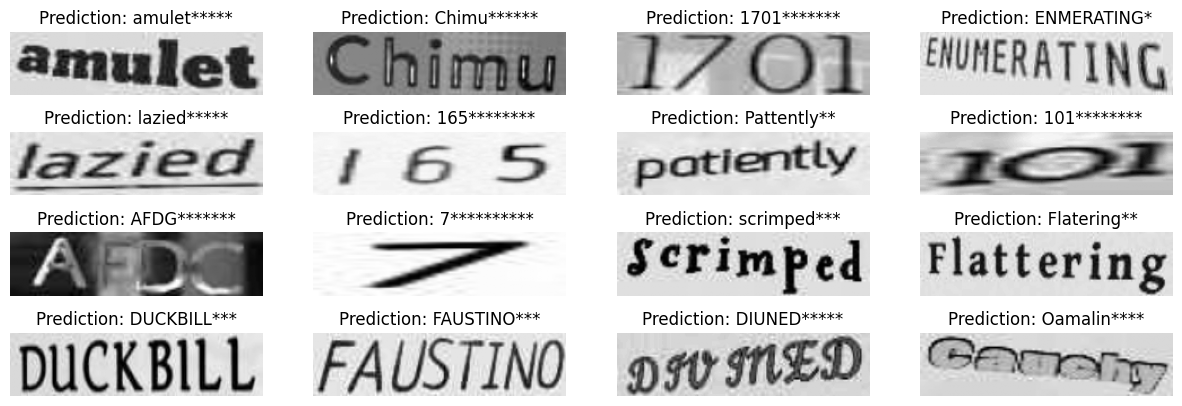

In [72]:
for batch in validation_dataset.skip(2).take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    print(preds[15,0,2])
    print(np.argmax(preds[15], axis=1))
    pred_texts = decode_batch_predictions(preds)
    print(pred_texts[15])

    # for i in range(len(pred_texts)):
    #     text = pred_texts[i]
    #     text = text.replace("*", "")
    #     pred_texts[i] = spell.correction(text)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        #label = label.replace("*", "")
        orig_texts.append(label)
    
    correct_predictions = sum([orig.lower() == pred.lower() for orig, pred in zip(orig_texts, pred_texts) if pred is not None])
    accuracy = correct_predictions / len(orig_texts) * 100
    print(f"Accuracy: {accuracy:.2f}%")

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(16):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

# **Demo**

In [118]:
import matplotlib.pyplot as plt

def get_image_0(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    return img

def get_word_coordinates(coord_path):
    word_coordinates=[]
    with open(coord_path,'r') as file:
        lines=file.readlines()

        for line in lines:
            line=line.replace('\n','')
            if line!='':
                coord=line.split(',')
                coord=list(map(int,coord))
                word_coordinates.append(coord)
    
    word_coordinates = np.array(word_coordinates)

    boxes = sorted(word_coordinates, key=lambda x: x[1])  # x[1] is the top-left y-coordinate

    # Group boxes into lines based on y-distance threshold
    lines = []
    current_line = [boxes[0]]
    
    threshold=0.5
    for i in range(1, len(boxes)):
        max_height_index=0
        max_height=0
        for j in range(len(current_line)):
            word_height=abs(max(np.array(current_line[j])[[1, 3, 5, 7]]) - min(np.array(current_line[j])[[1, 3, 5, 7]]))
            if word_height>max_height:
                max_height=word_height
                max_height_index=j

        if abs(boxes[i][1] - current_line[max_height_index][1]) < threshold*max_height:  # Adjust threshold as needed
            current_line.append(boxes[i])
        else:
            lines.append(sorted(current_line, key=lambda x: x[0]))  # Sort by x-coordinates (left to right)
            current_line = [boxes[i]]
        
    
    lines.append(sorted(current_line, key=lambda x: x[0]))

    # print(len(lines))
    # for line in lines:
    #     print(f'{line}\n')

    # Flatten the list of sorted lines
    sorted_boxes = [box for line in lines for box in line]
    
    return sorted_boxes

def get_each_word_image(img:np.ndarray,coord:list):
    x1,y1,x2,y2,x3,y3,x4,y4=coord
    
    x_start=min(x1,x4)
    y_start=min(y1,y2)

    x_end=max(x2,x3)
    y_end=max(y3,y4)

    cropped_img=img[y_start:y_end+1,x_start:x_end+1]

    return cropped_img

def resize_image_0(img, canvas_size=(32,128),interpolation=cv2.INTER_LINEAR):
    height,width,channels=img.shape
    target_height64=canvas_size[0]
    target_width128=canvas_size[1]

    if width>height:
        temp_ratio=target_width128/width
        if int(temp_ratio*height)>target_height64:
            ratio=target_height64/height
        else:
            ratio=temp_ratio
    else:
        temp_ratio=target_height64/height
        if int(temp_ratio*width)>target_width128:
            ratio=target_width128/width
        else:
            ratio=temp_ratio
    target_h=int(ratio*height)
    target_w=int(ratio*width)
    #proc=cv2.resize(img,(target_w,target_h),interpolation=interpolation)
    proc=cv2.resize(img,(112,28),interpolation=interpolation) #original resize size is (128,32)
    proc=np.expand_dims(proc, axis=-1)

    #resized=np.zeros((target_height64, target_width128, channels),dtype=np.float32)
    #resized[:target_h,:target_w]=proc

    return proc

def image_transformation(img):
    _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    white = np.sum(thresh == 255)
    black = np.sum(thresh == 0)

    if black > white:
        img = cv2.bitwise_not(img)

    img = cv2.resize(img, (112, 28), interpolation=cv2.INTER_LINEAR)
    
    #img = img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)

    blur = cv2.GaussianBlur(img, (1,1), 0)

    # Convert blur back to uint8 before thresholding again
    #blur_uint8 = np.clip(blur * 255.0, 0, 255).astype(np.uint8)

    _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Normalize final binary image
    img = binary_img.astype(np.float32) / 255.0
    img = np.expand_dims(img, axis=-1)
    img = np.transpose(img, axes=[1, 0, 2])

    return img

def cropped_images(result_path):
    img=get_image_0(os.path.join(result_path,'demo_transformed.jpg'))
    word_coordinates=get_word_coordinates(os.path.join(result_path,'res_demo_transformed.txt'))

    cropped_images=[]
    for coord in word_coordinates:
        
        cropped_img=get_each_word_image(img,coord)
        transformed_img=image_transformation(cropped_img)
        
        cropped_images.append(transformed_img)

    return cropped_images



images=cropped_images(result_path='artifacts/image/result')

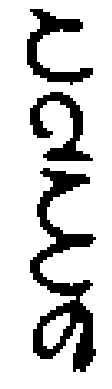

In [120]:
plt.imshow(images[1], cmap='gray')  # Use cmap='gray' for grayscale images if needed
plt.axis('off')  # Remove axes for better visualization
plt.show() 

In [114]:
preds_demo = prediction_model.predict(np.array(images))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [115]:
idx=5

print(preds_demo[idx,5,63])
print(np.argmax(preds_demo[idx], axis=1))
pred_texts = decode_batch_predictions(preds_demo)
print(pred_texts[idx])

0.9423283
[44 63 63 63 63 63 63 63 63 63 63 63 63 63]
h**********


# **Modular Code**

In [144]:
from dataclasses import dataclass

@dataclass(frozen=True)
class TextRecognitionConfig:
    crnn_weights: Path
    crnn_input_path: Path
    crnn_output_path: Path
    resize_canvas: tuple
    sorting_threshold: float
    char_list: list

In [161]:
from mlOCR.constants import *
from mlOCR.utils.common import read_yaml, create_directories
# from mlOCR.entity.config_entity import (TextPostProcessingConfig, TextRecognitionConfig, TextDetectionConfig,
#                                          ImageProcessingConfig,DemoImageConfig)
from pathlib import Path

class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH,
        schema_filepath = SCHEMA_FILE_PATH):

        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])

    
    
    def get_text_recognition_config(self)->TextRecognitionConfig:
        config=self.config.text_recognition
        params=self.params.text_recognition

        create_directories([config.crnn_output_path])

        text_recognition_config=TextRecognitionConfig(
            crnn_weights=Path(config.crnn_weights),
            crnn_input_path=Path(config.crnn_input_path),
            crnn_output_path=Path(config.crnn_output_path),
            resize_canvas=tuple(map(int,params.resize_canvas.translate(str.maketrans('','','()')).split(','))),
            sorting_threshold=float(params.sorting_threshold),
            char_list=params.char_list
        )

        return text_recognition_config

In [193]:
import cv2
import numpy as np
import os
import tensorflow as tf
import keras
from keras import layers
from keras import ops
import importlib
from mlOCR.models import crnn_pred
importlib.reload(crnn_pred)
from mlOCR.models.crnn_pred import crnn_pred_model
from mlOCR.utils.common import save_text_file

class TextRecognition:
    def __init__(self, TextRecognitionConfig):
        self.crnn_weights=TextRecognitionConfig.crnn_weights
        self.crnn_input_path=TextRecognitionConfig.crnn_input_path
        self.crnn_output_path=TextRecognitionConfig.crnn_output_path
        self.resize_canvas=TextRecognitionConfig.resize_canvas
        self.sorting_threshold=TextRecognitionConfig.sorting_threshold
        self.char_list=TextRecognitionConfig.char_list
        self.char_to_num = layers.StringLookup(vocabulary=list(self.char_list), mask_token=None, oov_token=None)
        self.num_to_char = layers.StringLookup(vocabulary=self.char_list, invert=True, mask_token=None, oov_token="*")

    
    def get_image(self,img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        return img

    def get_word_coordinates(self,coord_path):
        word_coordinates=[]
        with open(coord_path,'r') as file:
            lines=file.readlines()

            for line in lines:
                line=line.replace('\n','')
                if line!='':
                    coord=line.split(',')
                    coord=list(map(int,coord))
                    word_coordinates.append(coord)
        
        word_coordinates = np.array(word_coordinates)

        boxes = sorted(word_coordinates, key=lambda x: x[1])  # x[1] is the top-left y-coordinate

        # Group boxes into lines based on y-distance threshold
        lines = []
        current_line = [boxes[0]]
        
        threshold=self.sorting_threshold
        # threshold=0.5
        for i in range(1, len(boxes)):
            max_height_index=0
            max_height=0
            for j in range(len(current_line)):
                word_height=abs(max(np.array(current_line[j])[[1, 3, 5, 7]]) - min(np.array(current_line[j])[[1, 3, 5, 7]]))
                if word_height>max_height:
                    max_height=word_height
                    max_height_index=j

            if abs(boxes[i][1] - current_line[max_height_index][1]) < threshold*max_height:  # Adjust threshold as needed
                current_line.append(boxes[i])
            else:
                lines.append(sorted(current_line, key=lambda x: x[0]))  # Sort by x-coordinates (left to right)
                current_line = [boxes[i]]
            
        
        lines.append(sorted(current_line, key=lambda x: x[0]))

        # print(len(lines))
        # for line in lines:
        #     print(f'{line}\n')

        # Flatten the list of sorted lines
        sorted_boxes = [box for line in lines for box in line]
        
        return sorted_boxes

    def get_each_word_image(self,img:np.ndarray,coord:list):
        x1,y1,x2,y2,x3,y3,x4,y4=coord
        
        x_start=min(x1,x4)
        y_start=min(y1,y2)

        x_end=max(x2,x3)
        y_end=max(y3,y4)

        cropped_img=img[y_start:y_end+1,x_start:x_end+1]

        return cropped_img


    def image_transformation(self,img):
        _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        
        white = np.sum(thresh == 255)
        black = np.sum(thresh == 0)

        if black > white:
            img = cv2.bitwise_not(img)

        permuted_canvas_size = self.resize_canvas[::-1]  #(h,w) to (w,h)
        img = cv2.resize(img, permuted_canvas_size, interpolation=cv2.INTER_LINEAR)
        img = np.expand_dims(img, axis=-1)

        _, binary_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        img = binary_img.astype(np.float32) / 255.0
        img = np.expand_dims(img, axis=-1)
        img = np.transpose(img, axes=[1, 0, 2])

        return img

    def cropped_images(self):
        img=self.get_image(os.path.join(self.crnn_input_path,'demo_transformed.jpg'))
        word_coordinates=self.get_word_coordinates(os.path.join(self.crnn_input_path,'res_demo_transformed.txt'))

        cropped_images=[]
        for coord in word_coordinates:
            
            cropped_img=self.get_each_word_image(img,coord)
            transformed_img=self.image_transformation(cropped_img)
            
            cropped_images.append(transformed_img)

        return cropped_images
    
    def ctc_decode(self, y_pred, input_length, greedy=True, beam_width=100, top_paths=1):
        input_shape = ops.shape(y_pred)
        num_samples, num_steps = input_shape[0], input_shape[1]
        y_pred = ops.log(ops.transpose(y_pred, axes=[1, 0, 2]) + keras.backend.epsilon())
        input_length = ops.cast(input_length, dtype="int32")

        if greedy:
            (decoded, log_prob) = tf.nn.ctc_greedy_decoder(
                inputs=y_pred, sequence_length=input_length
            )
        else:
            (decoded, log_prob) = tf.compat.v1.nn.ctc_beam_search_decoder(
                inputs=y_pred,
                sequence_length=input_length,
                beam_width=beam_width,
                top_paths=top_paths,
            )
        decoded_dense = []
        for st in decoded:
            st = tf.SparseTensor(st.indices, st.values, (num_samples, num_steps))
            decoded_dense.append(tf.sparse.to_dense(sp_input=st, default_value=-1))
        return (decoded_dense, log_prob)
    
    def decode_batch_predictions(self,pred):
        input_len = np.ones(pred.shape[0]) * pred.shape[1]
        # Use greedy search. For complex tasks, you can use beam search
        results = self.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
            :, :
        ]
        # Iterate over the results and get back the text
        output_text = []
        for res in results:
            res = tf.strings.reduce_join(self.num_to_char(res)).numpy().decode("utf-8")
            res=res.replace("*", "")
            output_text.append(res)
        return output_text
    
    def get_predictions(self, cropped_images: list):
        crnn_pred=crnn_pred_model()
        crnn_pred.load_weights(self.crnn_weights)
        predictions=crnn_pred.predict(np.array(cropped_images))
        decoded_predictions=self.decode_batch_predictions(predictions)
        text=' '.join(decoded_predictions)

        return text
    
    def save_results(self, text: str):
        save_text_file(text=text, filename='crnn_raw_text.txt', path=self.crnn_output_path)

In [194]:
class TextRecognitionPipeline:
    def __init__(self):
        pass

    def main(self):
        config_manager=ConfigurationManager()
        text_recognition_config=config_manager.get_text_recognition_config()
        text_recognition=TextRecognition(text_recognition_config)
        cropped_images=text_recognition.cropped_images()
        text=text_recognition.get_predictions(cropped_images=cropped_images)
        text_recognition.save_results(text=text)

In [ ]:
from mlOCR import logger

STAGE_NAME='Text Recognition stage'
try:
    logger.info(f">>>>>> stage {STAGE_NAME} started <<<<<<")
    obj = TextRecognitionPipeline()
    obj.main()
    logger.info(f">>>>>> stage {STAGE_NAME} completed <<<<<<\n\nx==========x")
except Exception as e:
    logger.exception(e)
    raise e